In [1]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

from PIL import Image

In [3]:
#Wczytanie etykiet do treninegu 

with open('../Magisterka/identity_CelebA (2).txt',"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    i = i.replace("\n","")
    new.append(i.split(" "))
 
    
value_train = []

for i in range(len(lines)):
    value_train.append(int(new[i][1])) 
    
    


In [4]:
print(max(value_train))

10177


In [5]:
chrom = np.zeros((max(value_train)+1), dtype=np.uint16)


for i in value_train:
    chrom[i] = chrom[i] + 1


In [6]:
print(max(chrom))

index = np.where(chrom == max(chrom))

print(index)

35
(array([2820, 3227, 3782]),)


In [7]:
np.array(value_train)

array([ 2880,  2937,  8692, ...,  9852,  5570, 10101])

In [8]:
person = []


val = 2820

bb = value_train.index(val)
person = np.where(value_train == val)



In [9]:
print(person)
print(bb)

(array([], dtype=int64),)
1552


In [10]:
print(value_train[1])

2937


In [11]:
indeksy = [i for i, element in enumerate(value_train) if element == val]



for i in range(len(indeksy)):
    
    indeksy[i] = indeksy[i] + 1

In [12]:
print(indeksy)
print(len(indeksy))

[1553, 2558, 3568, 5265, 8235, 8286, 12101, 14715, 16174, 18144, 18909, 28690, 34377, 34769, 43941, 45344, 56764, 62065, 67445, 75590, 81558, 85080, 87813, 97468, 114148, 115262, 116428, 130485, 130858, 131983, 137347, 150905, 154010, 156283, 157826]
35


In [13]:
folder = '../Magisterka/img_align_celeba/img_align_celeba/'
docelowy = '../Magisterka/img_align_celeba/'
jpg = '.jpg'

In [14]:
twarz = Image.open('../Magisterka/img_align_celeba/img_align_celeba/'+'{:06d}'.format(indeksy[0])+'.jpg').convert('L')

(178, 218)


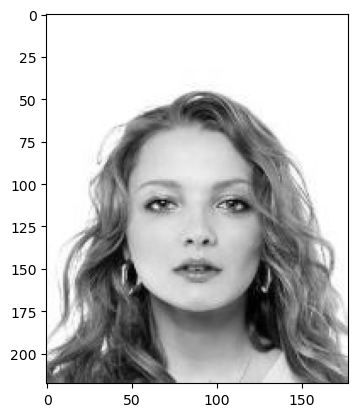

In [15]:
print(twarz.size)
plt.imshow(twarz, cmap = 'gray')

In [16]:
arr_twarz = np.array(twarz)

In [17]:
print(arr_twarz)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [101  81  87 ... 104 141 141]
 [103  94  89 ... 108 115 117]
 [111 101  95 ... 106 111 113]]


In [24]:
w, h = 92, 92
data = np.zeros((h, w), dtype=np.uint8)
data[0:w, 0:w] = [255] 

In [37]:
for x in range(w):
    for y in range(h):
        data[y][x] = arr_twarz[y+80][x+40]

In [38]:
con = Image.fromarray(data)

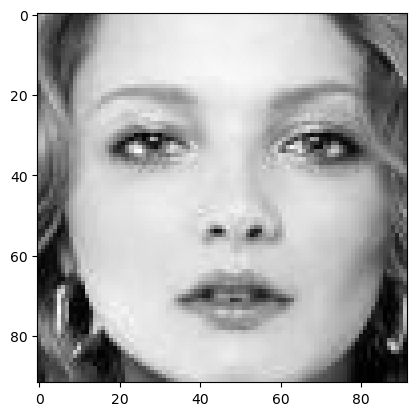

In [40]:
plt.imshow(con, cmap = 'gray')

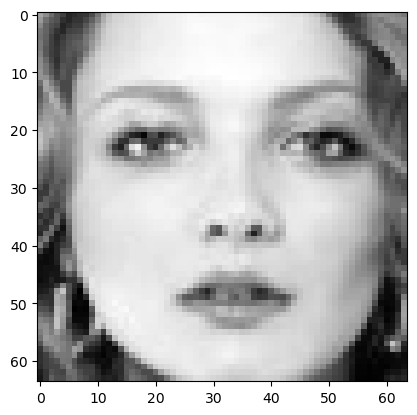

In [41]:
con_2 = con.resize((int(64), int(64)))
plt.imshow(con_2, cmap = 'gray')

In [17]:
#Wlasciwa czesc kodu
w, h = 92, 92

for i in range(len(indeksy)):
    im = Image.open(folder+'{:06d}'.format(indeksy[i])+jpg).convert('L') 
    im_arr = np.array(im)
    
    #Tworzenie pustej tablicy
    data = np.zeros((h, w), dtype=np.uint8)
    data[0:w, 0:w] = [255]    
    
    
    #Kopiowanie 92 wierszy (kwadratowy obraz)
    for x in range(w):
        for y in range(h):
            data[y][x] = im_arr[y+80][x+40]
    
    
    #konwersja tablicy znaków na obraz
    con = Image.fromarray(data)
    
    
    #Zmiana rozmiaru zdjec
    con_2 = con.resize((int(64), int(64)))
    
    
    
    con_2.save(docelowy+'nowe/'+str(i)+'.jpg')

001553
002558
003568
005265
008235
008286
012101
014715
016174
018144
018909
028690
034377
034769
043941
045344
056764
062065
067445
075590
081558
085080
087813
097468
114148
115262
116428
130485
130858
131983
137347
150905
154010
156283
157826
